In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read data from csv file
df= pd.read_csv("D:/Data/Viettel/Project 1/LasVegasTripAdvisorReviews-Dataset.csv", sep=';')
print(df.shape)

(504, 20)


In [3]:
df = df.drop(['User country'], axis=1)
df.head(3)

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday


In [4]:
categorical = list(df.select_dtypes(include=['object']).columns.values)
categorical

['Period of stay',
 'Traveler type',
 'Pool',
 'Gym',
 'Tennis court',
 'Spa',
 'Casino',
 'Free internet',
 'Hotel name',
 'Hotel stars',
 'User continent',
 'Review month',
 'Review weekday']

In [5]:
le = preprocessing.LabelEncoder()
# seasons in place of months
['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
df['Period of stay'] = df['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

for i in range(0, len(categorical)):
  #  df[categorical[i]] = le.fit_transform(df[categorical[i]])
    print(df[categorical[i]].unique())

['winter' 'spring' 'summer' 'autumn']
['Friends' 'Business' 'Families' 'Solo' 'Couples']
['NO' 'YES']
['YES' 'NO']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 'The Cromwell'
 'Encore at wynn Las Vegas' 'Hilton Grand Vacations on the Boulevard'
 "Marriott's Grand Chateau" 'Tuscany Las Vegas Suites & Casino'
 'Hilton Grand Vacations at the Flamingo' 'Wyndham Grand Desert'
 'The Venetian Las Vegas Hotel' 'Bellagio Las Vegas' 'Paris Las Vegas'
 'The Westin las Vegas Hotel Casino & Spa']
['3' '4' '5' '4,5' '3,5']
['North America' 'Europe' 'Asia' 'Oceania' 'Africa' 'South America']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'O

In [6]:
for i in range(0, len(categorical)):
    df[categorical[i]] = le.fit_transform(df[categorical[i]])
df.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,11,4,13,5,3,3,0,1,0,0,1,1,2,0,3773,3,9,4,4
1,119,21,75,3,3,0,0,1,0,0,1,1,2,0,3773,3,3,4,0
2,36,9,25,5,1,2,0,1,0,0,1,1,2,0,3773,3,2,3,2
3,14,7,14,4,1,3,0,1,0,0,1,1,2,0,3773,2,6,3,0
4,5,5,2,4,1,4,0,1,0,0,1,1,2,0,3773,3,7,7,5


In [7]:
# fill biến không hợp lệ bằng median
df.loc[df[df['Member years']<0].index, 'Member years']= np.NaN
df['Member years'].fillna(df['Member years'].median(), inplace=True)

### Recursive feature elimination

In [8]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Feature ranking:
1. feature 2 (0.119211)
2. feature 0 (0.119015)
3. feature 1 (0.105612)
4. feature 16 (0.091393)
5. feature 15 (0.088191)
6. feature 17 (0.077901)
7. feature 13 (0.066559)
8. feature 11 (0.064052)
9. feature 4 (0.060003)
10. feature 12 (0.059623)
11. feature 14 (0.052389)
12. feature 3 (0.045727)
13. feature 7 (0.011786)
14. feature 10 (0.010396)
15. feature 5 (0.009942)
16. feature 8 (0.009443)
17. feature 9 (0.005342)
18. feature 6 (0.003412)


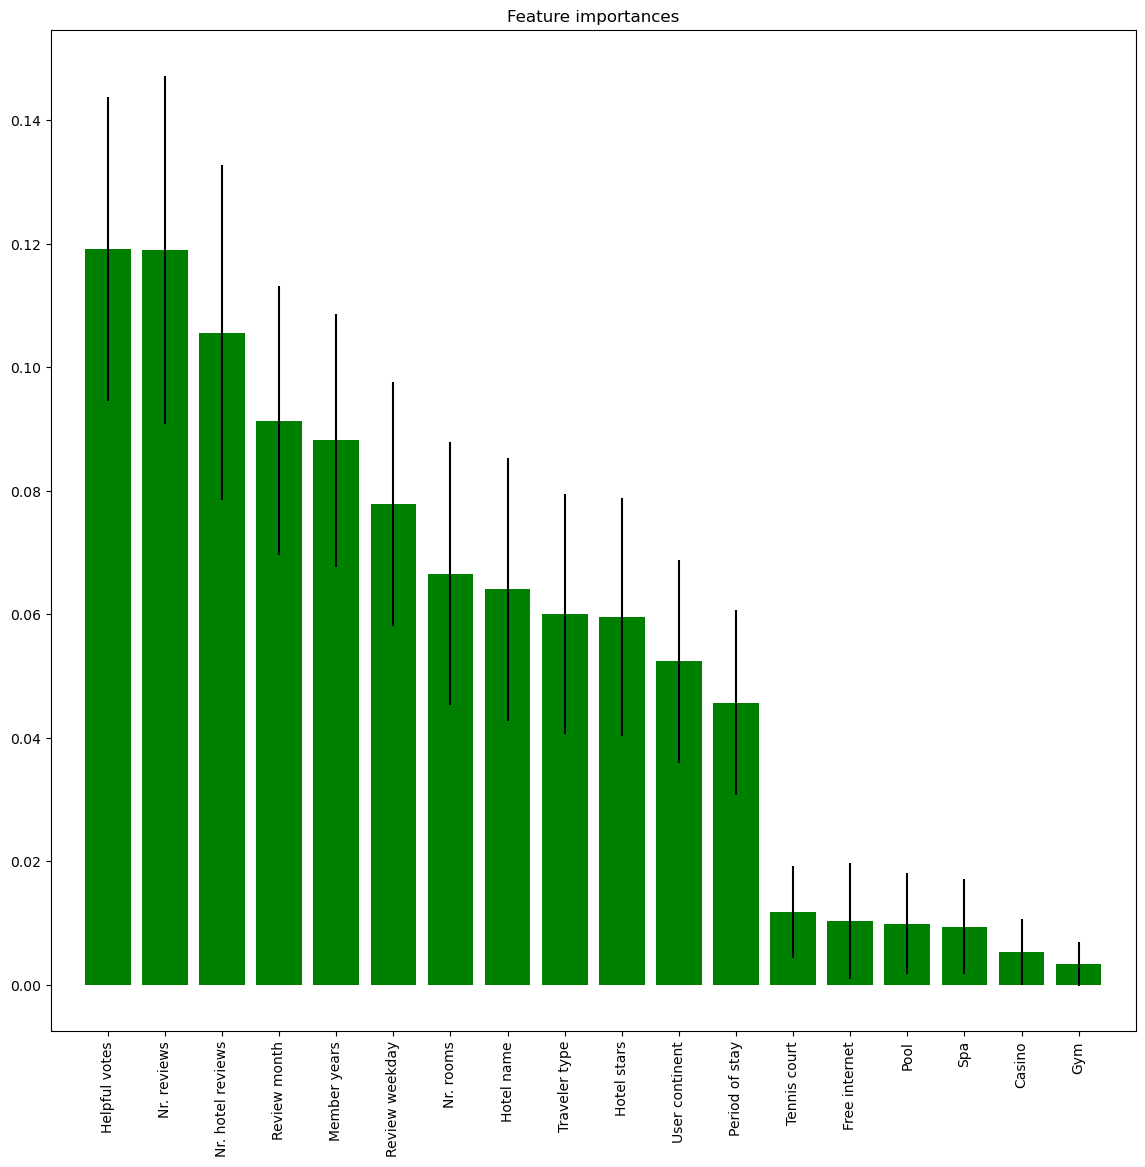

In [9]:
y_train = df['Score']
X_train = df.drop('Score', axis=1)

clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train,y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [10]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=12, step=1)
rfe = rfe.fit(X_train, y_train)
print(X_train.columns[rfe.support_])

Index(['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Period of stay',
       'Traveler type', 'Hotel name', 'Hotel stars', 'Nr. rooms',
       'User continent', 'Member years', 'Review month', 'Review weekday'],
      dtype='object')


### Oversampling & Data Splitting

In [11]:
X = df[['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Period of stay',
       'Traveler type', 'Hotel name', 'Hotel stars', 'Nr. rooms',
       'User continent', 'Member years', 'Review month', 'Review weekday']]
y = df['Score']

In [12]:
df['Score'].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

In [13]:
from pandas.core.common import random_state
from imblearn.combine import SMOTEENN
smtn = SMOTEENN(random_state = 0)
smtn.fit(X, y)
X, y = smtn.fit_resample(X, y)
y.value_counts()

1    162
2    122
3     95
4     35
5     32
Name: Score, dtype: int64

In [14]:
## prepare train and test labels
from sklearn.model_selection import train_test_split
X = df.drop(['Score'], axis=1)
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Run model

In [15]:
# import libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1     2     3      4      5  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
support    9.0  21.0  57.0  122.0  169.0       1.0      378.0         378.0
_______________________________________________
Confusion Matrix: 
 [[  9   0   0   0   0]
 [  0  21   0   0   0]
 [  0   0  57   0   0]
 [  0   0   0 122   0]
 [  0   0   0   0 169]]

Test Result:
Accuracy Score: 44.44%
_______________________________________________
CLASSIFICATION REPORT:
             1    2          3          4          5  accuracy   macro avg  \
precision  0.0  0.0   0.333333   0.309524   0.532468  0.444444    0.235065   
recall     0.0  0.0   0.133333   0.309524   0.706897  0.444444 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='distance',
                           algorithm='kd_tree',
                           n_jobs=-1)
knn.fit(X_train,y_train)
y_predknn = knn.predict(X_test)
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1     2     3      4      5  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
support    9.0  21.0  57.0  122.0  169.0       1.0      378.0         378.0
_______________________________________________
Confusion Matrix: 
 [[  9   0   0   0   0]
 [  0  21   0   0   0]
 [  0   0  57   0   0]
 [  0   0   0 122   0]
 [  0   0   0   0 169]]

Test Result:
Accuracy Score: 43.65%
_______________________________________________
CLASSIFICATION REPORT:
             1    2          3          4          5  accuracy   macro avg  \
precision  0.0  0.0   0.277778   0.350000   0.529412  0.436508    0.231438   
recall     0.0  0.0   0.333333   0.333333   0.620690  0.436508 

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.35%
_______________________________________________
CLASSIFICATION REPORT:
             1     2          3           4           5  accuracy   macro avg  \
precision  1.0   1.0   1.000000    0.959016    0.970930  0.973545    0.985989   
recall     1.0   1.0   0.947368    0.959016    0.988166  0.973545    0.978910   
f1-score   1.0   1.0   0.972973    0.959016    0.979472  0.973545    0.982292   
support    9.0  21.0  57.000000  122.000000  169.000000  0.973545  378.000000   

           weighted avg  
precision      0.973776  
recall         0.973545  
f1-score       0.973519  
support      378.000000  
_______________________________________________
Confusion Matrix: 
 [[  9   0   0   0   0]
 [  0  21   0   0   0]
 [  0   0  54   3   0]
 [  0   0   0 117   5]
 [  0   0   0   2 167]]

Test Result:
Accuracy Score: 39.68%
_______________________________________________
CLASSIFICATION REPORT:
             1    2          3          4          5  accuracy  

In [20]:
import xgboost as xgb

expected_classes = np.arange(5)
unique_values = np.unique(y_train)
if not np.array_equal(unique_values, expected_classes):
    # Convert the y array to integers using a dictionary mapping
    class_mapping = {c: i for i, c in enumerate(unique_values)}
    y_train = np.array([class_mapping[c] for c in y_train])
    y_test = np.array([class_mapping[c] for c in y_test])
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            learning_rate=0.1, 
                            max_depth=3, 
                            n_estimators=100)

xgb_clf.fit(X_train, y_train)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.51%
_______________________________________________
CLASSIFICATION REPORT:
                  0          1          2           3           4  accuracy  \
precision  1.000000   1.000000   0.952381    0.886957    0.820000  0.865079   
recall     0.888889   0.619048   0.701754    0.836066    0.970414  0.865079   
f1-score   0.941176   0.764706   0.808081    0.860759    0.888889  0.865079   
support    9.000000  21.000000  57.000000  122.000000  169.000000  0.865079   

            macro avg  weighted avg  
precision    0.931867      0.875858  
recall       0.803234      0.865079  
f1-score     0.852722      0.861971  
support    378.000000    378.000000  
_______________________________________________
Confusion Matrix: 
 [[  8   0   0   0   1]
 [  0  13   1   0   7]
 [  0   0  40   8   9]
 [  0   0   1 102  19]
 [  0   0   0   5 164]]

Test Result:
Accuracy Score: 45.24%
_______________________________________________
CLASSIFICATION REPORT:
             0

In [21]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf', C=1, gamma='scale')
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 44.71%
_______________________________________________
CLASSIFICATION REPORT:
             0     1     2      3           4  accuracy   macro avg  \
precision  0.0   0.0   0.0    0.0    0.447090   0.44709    0.089418   
recall     0.0   0.0   0.0    0.0    1.000000   0.44709    0.200000   
f1-score   0.0   0.0   0.0    0.0    0.617916   0.44709    0.123583   
support    9.0  21.0  57.0  122.0  169.000000   0.44709  378.000000   

           weighted avg  
precision      0.199889  
recall         0.447090  
f1-score       0.276264  
support      378.000000  
_______________________________________________
Confusion Matrix: 
 [[  0   0   0   0   9]
 [  0   0   0   0  21]
 [  0   0   0   0  57]
 [  0   0   0   0 122]
 [  0   0   0   0 169]]

Test Result:
Accuracy Score: 46.03%
_______________________________________________
CLASSIFICATION REPORT:
             0    1     2     3          4  accuracy   macro avg  weighted avg
precision  0.0  0.0   0.0   0.0   0